In [108]:
# Import dependencies
import pandas as pd
import pandas.plotting as pp
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import os

In [109]:
# Read data
zoo_df = pd.read_csv(os.path.join("data", "zoo_animals.csv"))
zoo_df = zoo_df.drop('animal name', axis = 1)
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [110]:
target = zoo_df['type']
target_names = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Insect', 'Invertebrate']

In [111]:
data = zoo_df.drop('type', axis=1)
feature_names = data.columns
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [112]:
X = data
y = target

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [114]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [115]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

In [116]:
train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.952
k: 3, Train/Test Score: 0.975/1.000
k: 5, Train/Test Score: 0.975/0.952
k: 7, Train/Test Score: 0.975/0.952
k: 9, Train/Test Score: 0.887/0.905
k: 11, Train/Test Score: 0.825/0.857
k: 13, Train/Test Score: 0.812/0.857
k: 15, Train/Test Score: 0.825/0.857
k: 17, Train/Test Score: 0.850/0.857
k: 19, Train/Test Score: 0.850/0.810


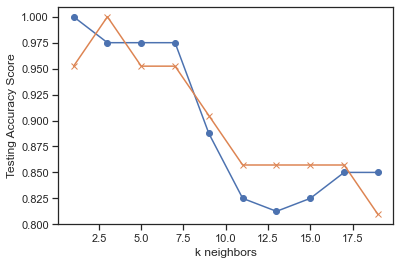

In [117]:
plt.plot(range(1, 20, 2), train_scores, marker = "o")
plt.plot(range(1, 20, 2), test_scores, marker ="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [118]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.952
